In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-data-set/diabetes.csv


# Introduction

<font size=5> After exploratory data analysis, I have done Feature Engineering and normalized numerical data before training a model.</font>

# import library and data

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/kaggle/input/diabetes-data-set/diabetes.csv")
data.sample(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
384,1,125,70,24,110,24.3,0.221,25,0
382,1,109,60,8,182,25.4,0.947,21,0


In [4]:
print(data['Outcome'].unique())
print(data.info())
print("-"*100)
print("Check null data")
data.isnull().sum()

[1 0]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
----------------------------------------------------------------------------------------------------
Check null data


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


The standard variation for glucose and insulin are really large. I infer there are some outliners in these two columns. Next, I will do EDA to find more information for those data

# Exploratory Data Analysis

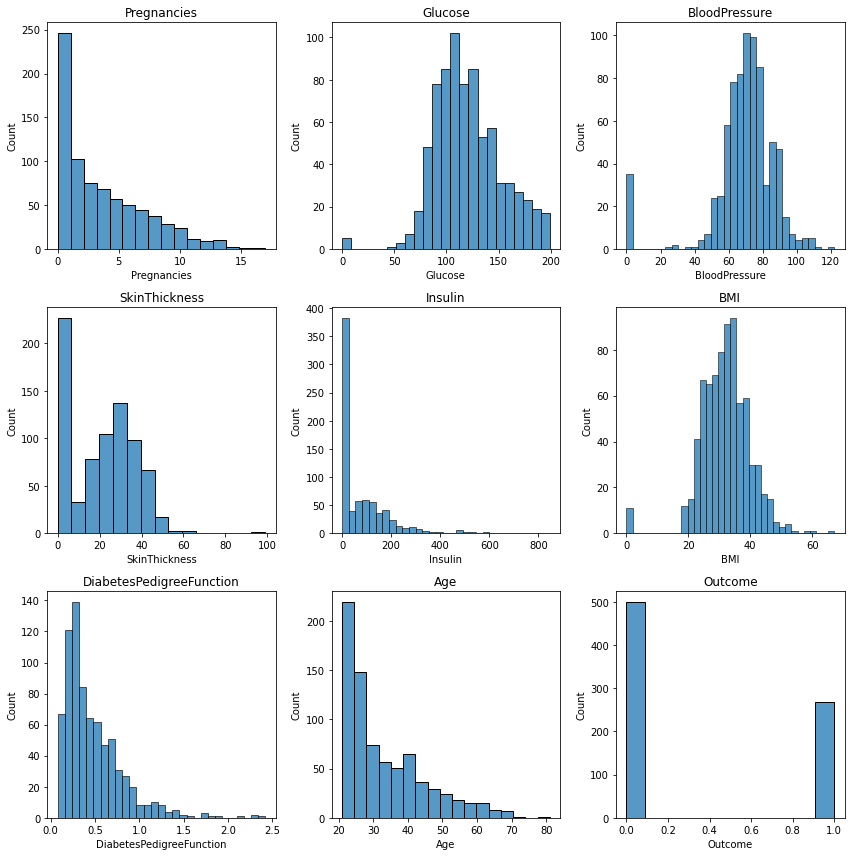

In [6]:
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3, figsize=(12,12))
sns.histplot(data['Pregnancies'], ax=ax1).set(title='Pregnancies')
sns.histplot(data['Glucose'], ax=ax2).set(title='Glucose')
sns.histplot(data['BloodPressure'], ax=ax3).set(title='BloodPressure')
sns.histplot(data['SkinThickness'], ax=ax4).set(title='SkinThickness')
sns.histplot(data['Insulin'], ax=ax5).set(title='Insulin')
sns.histplot(data['BMI'], ax=ax6).set(title='BMI')
sns.histplot(data['DiabetesPedigreeFunction'], ax=ax7).set(title='DiabetesPedigreeFunction')
sns.histplot(data['Age'], ax=ax8).set(title='Age')
sns.histplot(data['Outcome'], ax=ax9).set(title='Outcome')
fig.tight_layout()
plt.show()

* The zero information for glucose, bloodpressure, skinThickness, Insulin, BMI are weird. I will fill in those zero data
* People who didn't pregnanet are much more than others. I will create a new column to check if pregnancy has relation to diabetes
* The data for most of columns are skewed, I will normalize them before building the model
* Outcome is unbalanced, I will balance it

In [7]:
data['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

Actually,the feature what I should create is <= 2 for pregnancies

# Data Preprocessing

### Null data treatment

In [8]:
#zero values exist in five columns is weird, replacing these zero values to Nan Value will be more reasonable
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    data[col].replace(0,np.NaN,inplace=True)

data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
data.isnull().sum() / len(data) * 100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

SkinThickness and Insulin has more serious missing data

filling in missing data via KNN imputer. Because KNN Imptuer is a distance-based imputation method, it requires us to normalize our data. Also normalized data can produce better results in some machine learning model, such as logestic regression, SVM, and KNN, etc.

In [10]:
from sklearn.preprocessing import MinMaxScaler

#normalize data to make all data located between 0 to 1
the_scaler = MinMaxScaler()
data = pd.DataFrame(the_scaler.fit_transform(data), columns=data.columns)

# fill in missing data via KNN imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(data),columns = data.columns)

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# transform data back to original scaler
df = pd.DataFrame(the_scaler.inverse_transform(df), columns=data.columns)

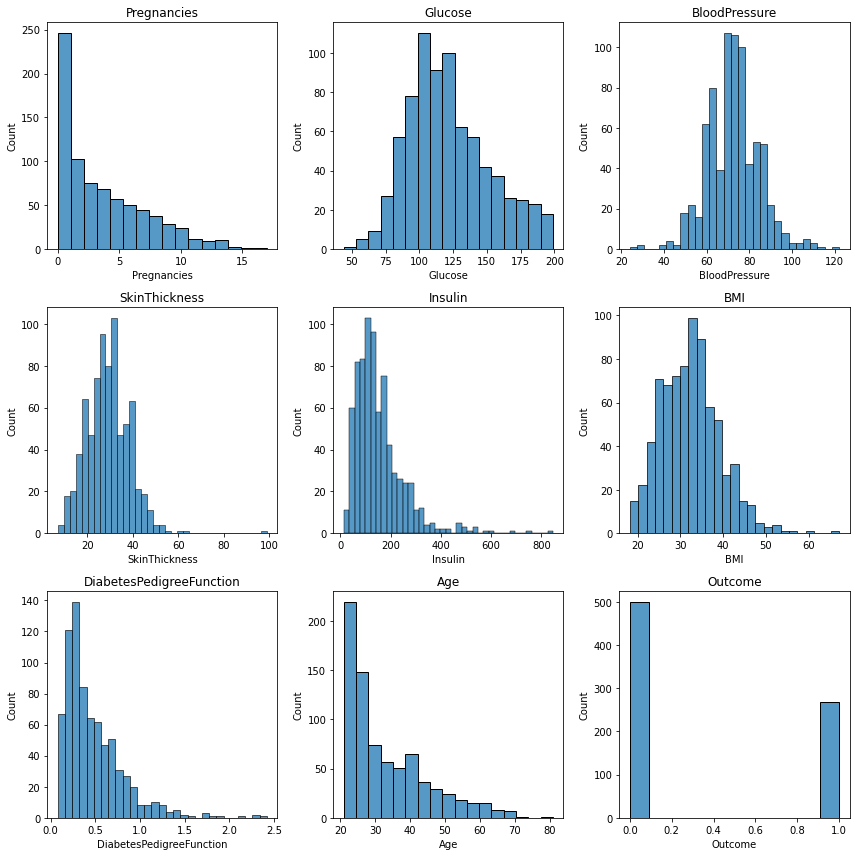

In [12]:
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3, figsize=(12,12))
sns.histplot(df['Pregnancies'], ax=ax1).set(title='Pregnancies')
sns.histplot(df['Glucose'], ax=ax2).set(title='Glucose')
sns.histplot(df['BloodPressure'], ax=ax3).set(title='BloodPressure')
sns.histplot(df['SkinThickness'], ax=ax4).set(title='SkinThickness')
sns.histplot(df['Insulin'], ax=ax5).set(title='Insulin')
sns.histplot(df['BMI'], ax=ax6).set(title='BMI')
sns.histplot(df['DiabetesPedigreeFunction'], ax=ax7).set(title='DiabetesPedigreeFunction')
sns.histplot(df['Age'], ax=ax8).set(title='Age')
sns.histplot(df['Outcome'], ax=ax9).set(title='Outcome')
fig.tight_layout()
plt.show()

## Skewed Data

In [13]:
print("skewness before filling in zero data")
print(data.skew())
print("-"*100)
print("skewness after filling in zero data")
print(df.skew())

skewness before filling in zero data
Pregnancies                 0.901674
Glucose                     0.530989
BloodPressure               0.134153
SkinThickness               0.690619
Insulin                     2.166464
BMI                         0.593970
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64
----------------------------------------------------------------------------------------------------
skewness after filling in zero data
Pregnancies                 0.901674
Glucose                     0.530521
BloodPressure               0.146822
SkinThickness               0.670142
Insulin                     2.139245
BMI                         0.602191
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64


The skewness doesn't improve so well after filling zero data. From above data, I notice there are some outliner in SkinThickness, Insulin, BMI, DiabetesPedigreeFunction and Age. Therefore, I try to remove those outliners to eliminate the influence of skewness

In [14]:
df = df[(df['SkinThickness'] < 80) & (df["Insulin"] < 600) & (df['BMI'] < 57) & (df['DiabetesPedigreeFunction'] < 2) & (df['Age']<75)]
df.skew()

Pregnancies                 0.900639
Glucose                     0.532849
BloodPressure               0.136832
SkinThickness               0.137683
Insulin                     1.536379
BMI                         0.367131
DiabetesPedigreeFunction    1.446965
Age                         1.093091
Outcome                     0.654438
dtype: float64

The skewness improved, and i am going to use the cleaned data to build ML model

## Bivariate Analysis

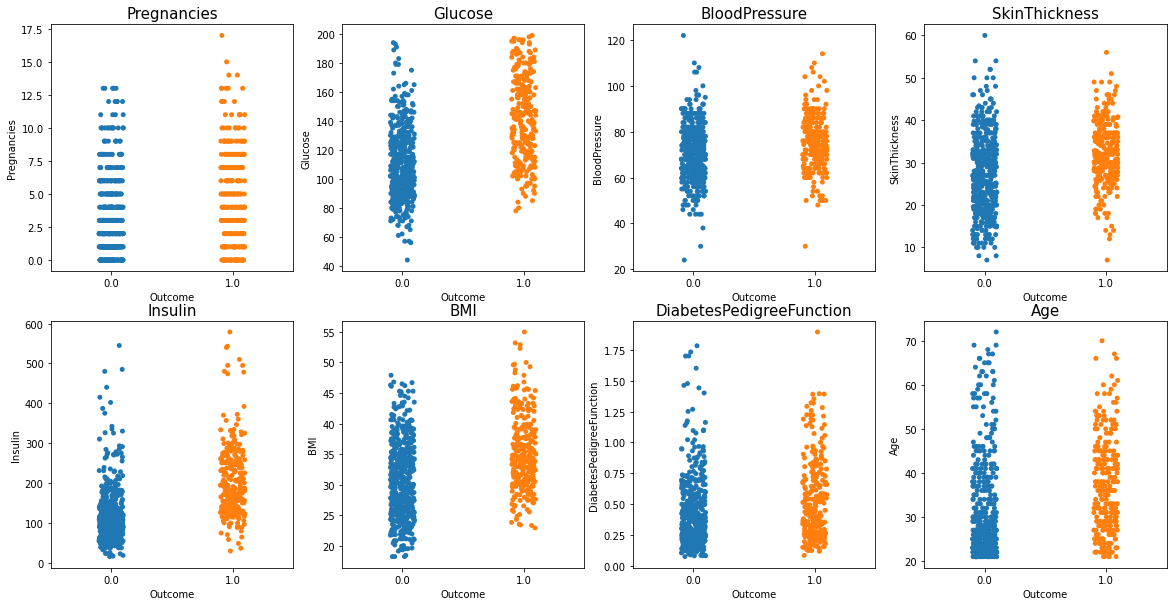

In [15]:
plt.figure(figsize=(20,10))

for i in range(8):
    col = data.columns[i]
    plt.subplot(2,4,i+1)
    sns.stripplot(x='Outcome', y=col, data=df)
    plt.title(col, fontsize=15)

* pregnancy over around 13.75, the outcome is 1
* glucose lower 75 will not be diagnosed to diabates
* people whose BMI larger than 48 have diabetes. By contrast, people whose BMI lower 22 are healthy

I am going to check those observation and I could create some features to improve my model

[Text(0.5, 1.0, 'Outcome for Pregnancies > 2')]

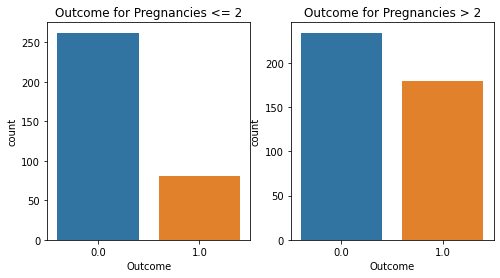

In [16]:
fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(8,4))
sns.countplot(x='Outcome', ax=ax1, data=df[df['Pregnancies']<=2]).set(title='Outcome for Pregnancies <= 2')
sns.countplot(x='Outcome', ax=ax2, data=df[df['Pregnancies']>2]).set(title='Outcome for Pregnancies > 2')

The number of no diabates doesn't change in these two groups. However, the number of people who had diabetes was fewer in the group of pregnancies <= 2. Therefore, I will create a feature for this

In [17]:
print(df[df['Outcome']==0]['Pregnancies'].max())
print(df[df['Outcome']==1]['Glucose'].min())
print(df[df['Outcome']==0]['BMI'].max())
print(df[df['Outcome']==1]['BMI'].min())

13.0
77.99999999999999
47.89999999999999
22.9


In [18]:
print(len(df[df['Pregnancies']>13]))
print(len(df[df['Glucose']<80]))
print(len(df[df['BMI']>47.89]))
print(len(df[df['BMI']<22.9]))

4
36
12
49


Only four data for the pregancies obseervation. The effect will be insignificant. The rest three features I will create

## Correlation

<AxesSubplot:>

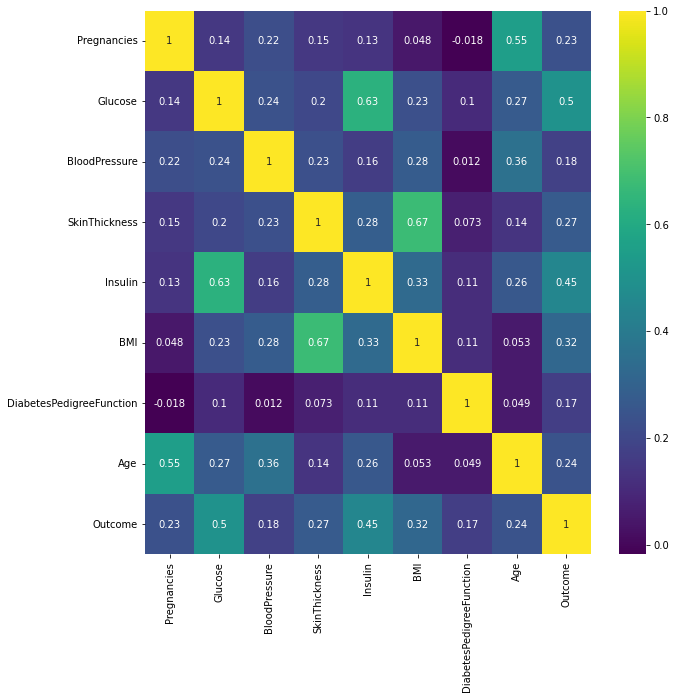

In [19]:
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(),annot=True, cmap = 'viridis')

<font size=3>Glucose has higher correlation to insulin, but the more interesting thing is that BMI has higher correlation to Skinthickness</font>

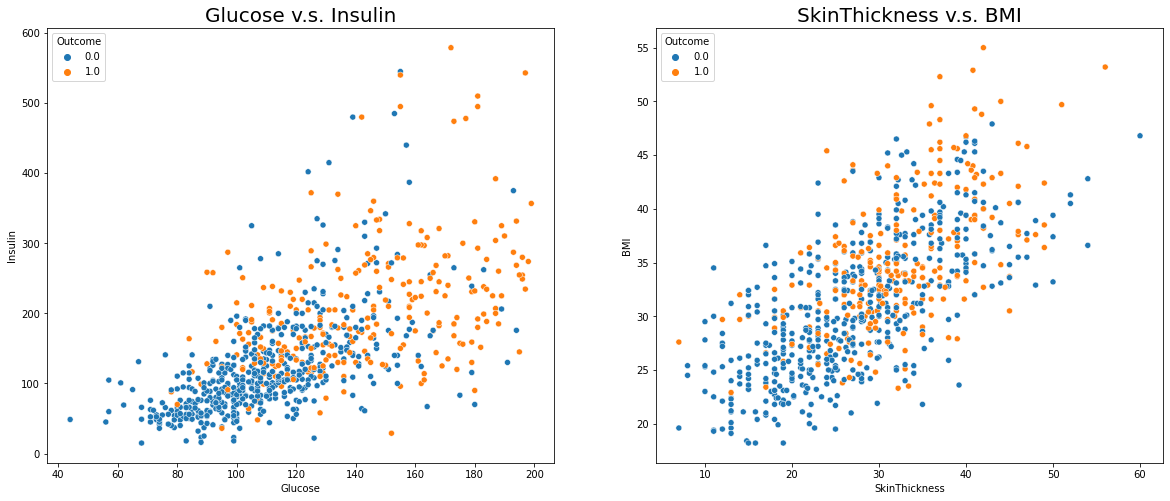

In [20]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.scatterplot(x='Glucose', y='Insulin', hue='Outcome', data=df)
plt.title("Glucose v.s. Insulin", fontsize=20)

plt.subplot(1,2,2)
sns.scatterplot(x='SkinThickness', y='BMI', hue='Outcome', data=df)
plt.title("SkinThickness v.s. BMI", fontsize=20)

plt.show()

# Feature Engineering

Base on CDC, 
1. <b>Glucose</b> --- A fasting blood sugar level(Glucose) of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates you have prediabetes, and 126 mg/dL or higher indicates you have diabetes.
https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwicm-2vg_H4AhXagoQIHeBqDkkQFnoECBMQAw&url=https%3A%2F%2Fwww.cdc.gov%2Fdiabetes%2Fbasics%2Fgetting-tested.html&usg=AOvVaw14tQUqSBQh0XcC2f9dSX9-<br>

| Normal   |Prediabetes|Diabates|
|-------   |-----------|--------|
|<=99mg/dL|100-125mg/dL| >126mg/dL|


2. <b>BMI</b> --- Below 18.5, Underweight ; 18.5—24.9, Healthy ; 25.0—29.9, Overweight ; 30.0 and Above, Obese
https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiZ_LrQg_H4AhXutYQIHckaCNgQFnoECBAQAQ&url=https%3A%2F%2Fwww.cdc.gov%2Fhealthyweight%2Fassessing%2Fbmi%2Fadult_bmi%2Fenglish_bmi_calculator%2Fbmi_calculator.html&usg=AOvVaw2F_ENcffxAfvVdtJK_ppa5<br>
| Underweight | Healthy| Overweight| Obese |
|-------   |-----------|--------| ------ |
|<18.4| 18.5—24.9 |25.0—29.9 | >30|

3.<b>Blood Pressure</b> --- According to American Hear Association<br>
![Blood Pressure Category](https://www.heart.org/-/media/Images/Health-Topics/High-Blood-Pressure/Rainbow-Chart/blood-pressure-readings-chart.jpg)

In [21]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,150.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,26.4,122.4,30.1,0.349,47.0,1.0
767,1.0,93.0,70.0,31.0,72.4,30.4,0.315,23.0,0.0


In [22]:
df['New_Glucose_Class'] = pd.cut(x=df['Glucose'], bins=[0,99,125, 210],labels = ["Normal","Prediabetes", "Diabates"])
df['New_BMI_Range'] = pd.cut(x=df['BMI'], bins=[0,18.4,24.9,29.9,100],labels = ["Underweight","Healty","Overweight","Obese"])
df['New_BloodPressure'] = pd.cut(x=df['BloodPressure'], bins=[0,79,89,120,200],labels = ["Normal","HS1","HS2","HS_Crisis"])
df["pregnancies<=2"] = np.where(df['Pregnancies']<=2, 1, 0)
df["Glucose<80"] = np.where(df['Glucose']<80,1, 0)
df["BMI>47.89"] = np.where(df['BMI']>47.89,1, 0)
df['BMI<22.9'] = np.where(df['BMI']<22.9,1, 0)

In [23]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Class,New_BMI_Range,New_BloodPressure,pregnancies<=2,Glucose<80,BMI>47.89,BMI<22.9
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0,Prediabetes,Obese,Normal,0,0,0,0
764,2.0,122.0,70.0,27.0,150.0,36.8,0.340,27.0,0.0,Prediabetes,Obese,Normal,1,0,0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0,Prediabetes,Overweight,Normal,0,0,0,0
766,1.0,126.0,60.0,26.4,122.4,30.1,0.349,47.0,1.0,Diabates,Obese,Normal,1,0,0,0
767,1.0,93.0,70.0,31.0,72.4,30.4,0.315,23.0,0.0,Normal,Obese,Normal,1,0,0,0


In [24]:
df.dtypes

Pregnancies                  float64
Glucose                      float64
BloodPressure                float64
SkinThickness                float64
Insulin                      float64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                          float64
Outcome                      float64
New_Glucose_Class           category
New_BMI_Range               category
New_BloodPressure           category
pregnancies<=2                 int64
Glucose<80                     int64
BMI>47.89                      int64
BMI<22.9                       int64
dtype: object

## Label Categorical Data

In [25]:
#Select columns columns
categorical_cols = [cname for cname in df.columns if  df[cname].dtype == "category"]

In [26]:
categorical_cols

['New_Glucose_Class', 'New_BMI_Range', 'New_BloodPressure']

In [27]:
# chagne categorical data into numerical data
from sklearn.preprocessing import LabelEncoder


def label_encoder(data, i):
    le = LabelEncoder()
    data[i] = le.fit_transform(data[i])
  
    
for l in categorical_cols:
    label_encoder(df,l)

In [28]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
New_Glucose_Class           0
New_BMI_Range               0
New_BloodPressure           0
pregnancies<=2              0
Glucose<80                  0
BMI>47.89                   0
BMI<22.9                    0
dtype: int64

In [29]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Class,New_BMI_Range,New_BloodPressure,pregnancies<=2,Glucose<80,BMI>47.89,BMI<22.9
0,6.0,148.0,72.0,35.0,334.2,33.6,0.627,50.0,1.0,0,1,3,0,0,0,0
1,1.0,85.0,66.0,29.0,56.2,26.6,0.351,31.0,0.0,1,2,3,1,0,0,0


<AxesSubplot:>

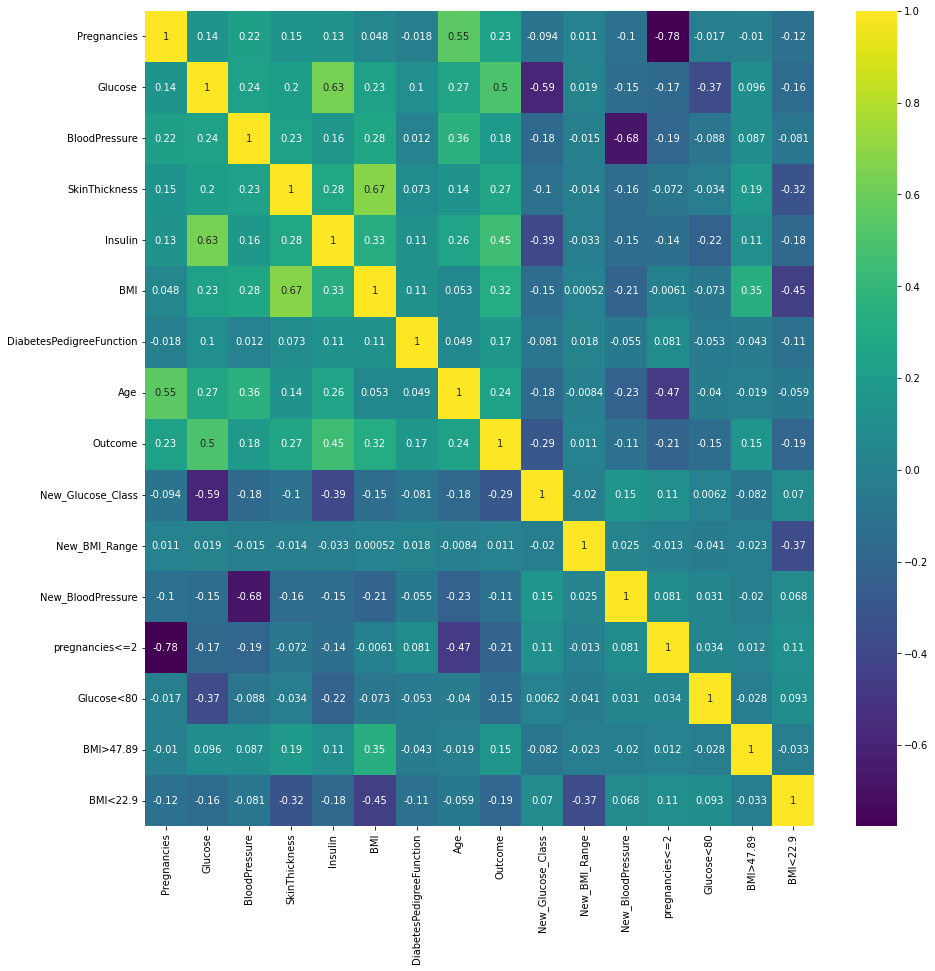

In [30]:
plt.figure(figsize=(15,15))

sns.heatmap(df.corr(),annot=True, cmap = 'viridis')

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'New_Glucose_Class', 'New_BMI_Range', 'New_BloodPressure',
       'pregnancies<=2', 'Glucose<80', 'BMI>47.89', 'BMI<22.9'],
      dtype='object')

In [33]:
#select the factors with correlation > 0.15
selected = ['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin',
       'BMI',  'Age', 
       'New_Glucose_Class', 'pregnancies<=2']

In [34]:
# split data
x=df[selected]
y=df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((605, 8), (152, 8), (605,), (152,))

## Building Model 

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [36]:
def KNN(n,X_train, Y_train, X_test, Y_test):
    model = KNeighborsClassifier(n_neighbors=n) 
    scores = cross_val_score(model,X_train,Y_train,cv=10,scoring='accuracy')
    model.fit(X_train,Y_train)
    return (scores.mean() * 100,model.score(X_test,Y_test)*100)

In [37]:
KNN(7,x_train,y_train,x_test,y_test)

(76.86338797814207, 75.6578947368421)